In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [ ]:
def lightcurve(star_radius, planet_radius, imsize=(200, 200)):
    area_star_fractional = []
    field = np.zeros(imsize)
    star = create_circular_mask(imsize[0], imsize[1], radius=star_radius)
    field[star] = 1.0
    area_star_total = np.sum(star)

    for x in np.arange(imsize[0]):
        planet = create_circular_mask(imsize[0], imsize[1], center=(x, imsize[1]/2), radius=planet_radius)
        field[star] = 1.0
        field[planet] = 0.0
        area_star_fractional.append(np.sum(field))
    
    area_star = np.array(area_star_fractional)/area_star_total
#     plt.imshow(star)

    return np.arange(imsize[0]), area_star
imsize = 400, 400
x, y = lightcurve(75, 60, imsize=imsize)

In [91]:
import ipywidgets as widgets

a = widgets.FloatText()
b = widgets.FloatSlider(min=10, max=90, step=1, value=50)
display(a,b)

mylink = widgets.jslink((a,'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=50.0, max=90.0, min=10.0, step=1.0)

In [97]:
import pandas as pd
imsize = 400, 400
pr, sr = int(mylink.source[0].value), 100
time, flux = lightcurve(sr, pr, imsize=imsize)
dfs = pd.DataFrame({'time': time, 'flux': flux, 'star_radius': sr, 'planet_radius': pr})
print(pr)

59


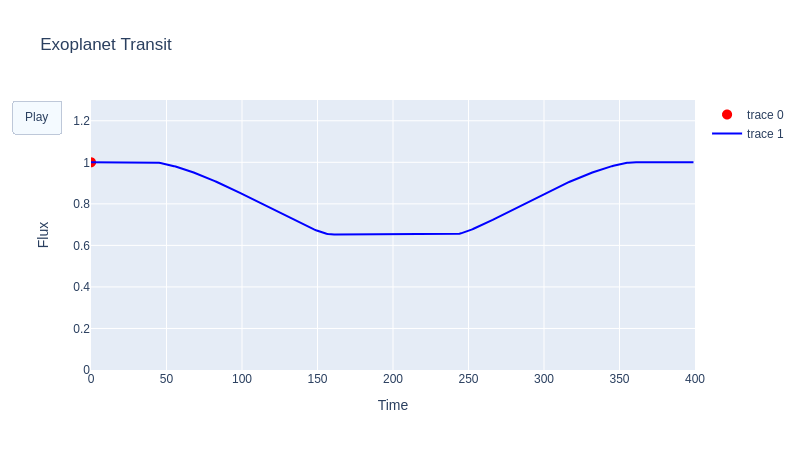

In [101]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=dfs.time.values, y=dfs.flux.values,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=dfs.time.values, y=dfs.flux.values,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[0, imsize[0]], autorange=False, zeroline=False),
        yaxis=dict(range=[0, 1.3], autorange=False, zeroline=False),
        title_text="Exoplanet Transit", hovermode="closest",
        xaxis_title='Time',
        yaxis_title='Flux',
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[dfs.time.values[::5][k]],
            y=[dfs.flux.values[::5][k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(dfs.time.values[::5].shape[0])]
)

fig.show()

In [ ]:
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.io import output_notebook, push_notebook, show

output_notebook()



planet_radius_slider = Slider(start=10, end=70, value=10, step=1, title="Planet Radius")
star_radius_slider = Slider(start=1, end=100, value=100, step=1, title="Star Radius")

# Add callback to widgets
def callback(attr, old, new):
    pr = planet_radius_slider.value
    sr = star_radius_slider.value
    t, f = lightcurve(sr, pr, imsize=(fieldx, fieldy))
    source.data={'x': t, 'y': f}

t, f = lightcurve(200, 20, imsize=(fieldx, fieldy))
source = ColumnDataSource(data=dict(x=t, y=f))

plot = figure(y_range=(0, 1.5), plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
    

callback = CustomJS(args=dict(source=source, pr=planet_radius_slider, sr=star_radius_slider),
                    code="""
    const SR = sr.value;
    const PR = PR.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")
    

planet_radius_slider.on_change('value', callback)
star_radius_slider.on_change('value', callback)

# Arrange plots and widgets in layouts
layout = row(plot, column(planet_radius_slider, star_radius_slider))
show(layout, notebook_url=remote_jupyter_proxy_url, notebook_handle=True)

In [ ]:
show(layout, notebook_handle=True)


In [ ]:
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_file, show

output_notebook()
x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

push_notebook(show(layout))
